#✅ Visualization Techniques & Their Purpose

| ✅ Visualization Technique             | 📌 Purpose                                                                 |
|----------------------------------------|---------------------------------------------------------------------------|
| **1. Line Plots**                      | Visualize overall stock price trends over time for different tickers.     |
| **2. Rolling Averages (30-day SMA)**   | Smooth short-term fluctuations and identify long-term trends.            |
| **3. Boxplots (Outlier Detection)**    | Detect extreme values in closing prices across tickers.                  |
| **4. Volume Trend Line**               | Understand trading activity patterns and spikes in volume.               |
| **5. Returns Distribution (Histogram)**| Analyze daily returns distribution to evaluate volatility and skewness. |
| **6. Correlation Heatmap**             | Discover relationships and co-movements between different tickers.       |
| **7. Volatility (Rolling Std Dev)**    | Track how volatility changes over time (e.g., 21-day rolling window).    |
| **8. Trend Classification Count**      | Analyze binary classification: how often price goes up/down.             |
| **9. Plotly Close vs Volume (Scatter)**| Interactive view of how volume affects price movements.                  |
| **10. Candlestick Chart (Plotly)**     | Visualize daily price ranges (open, high, low, close) in trading format. |
| **11. RSI (Relative Strength Index)**  | Detect overbought/oversold signals in momentum-based trading.            |
| **12. MACD (Moving Avg Convergence)**  | Identify momentum shifts using trend-following indicators.               |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Checking whether the Google Drive path exists or not

In [4]:
!ls -l "/content/drive/My Drive/Stock Price Prediction Project/DataSet"

total 711694
-rw------- 1 root root      3429 Jul  8 16:58 final_forecasts_with_all_models.csv
-rw------- 1 root root       178 Jul  9 02:47 final_forecasts_with_all_models.gsheet
-rw------- 1 root root     27073 Jul  7 17:36 next_day_predicted_price_comparison.csv
-rw------- 1 root root       178 Jul  7 17:38 next_day_predicted_price_comparison.gsheet
-rw------- 1 root root 147033850 Feb  3 04:28 SnP_daily_update.csv
-rw------- 1 root root  99822247 Jun 17 05:18 SnP_daily_update.xlsx
-rw------- 1 root root 175096262 Jul  1 15:38 stock_data_long_filled.csv
-rw------- 1 root root 166846261 Jul  1 15:38 stock_data_long_nonempty.csv
-rw------- 1 root root 139943382 Jul  1 15:37 stock_data_wide.csv


#Checking whether the file exist or not

In [5]:
import os
file_path1 = '/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_wide.csv'
file_path2 = '/content/drive/My Drive/Stock Price Prediction ProjectDataSet/stock_data_long_filled.csv'
file_path3 = '/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_nonempty.csv'

print("file_path1 exists :",os.path.exists(file_path1))
print("file_path1 exists :",os.path.exists(file_path2))
print("file_path1 exists :",os.path.exists(file_path3))

file_path1 exists : True
file_path1 exists : False
file_path1 exists : True


# Load DataFrames

In [6]:
wide_df = pd.read_csv("/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_wide.csv")
long_df = pd.read_csv("/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_filled.csv")
nonempty_df = pd.read_csv("/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_nonempty.csv")

In [7]:
# Ensure Date columns are datetime
for df in [wide_df, long_df, nonempty_df]:
    df['Date'] = pd.to_datetime(df['Date'])

## 1. Line plot of Close prices for a few tickers
✅ What it shows:
How the price of a stock (like AAPL or TSLA) changes over time.

🧠 Why it's important:
Helps you visually track the stock trend: Is it rising, falling, or fluctuating?

🔧 How we did it:
For each date, we plot the closing price.
One smooth line per stock.
"""

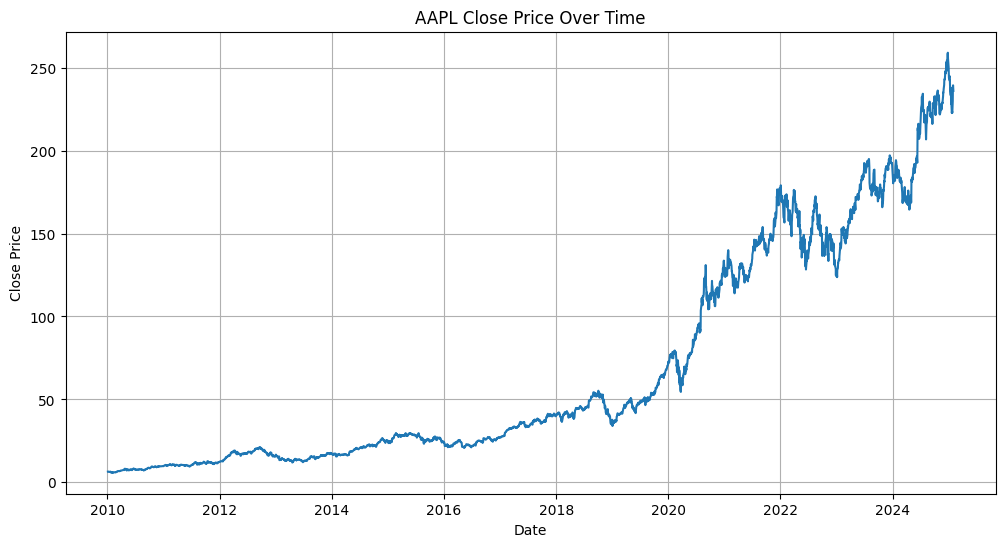

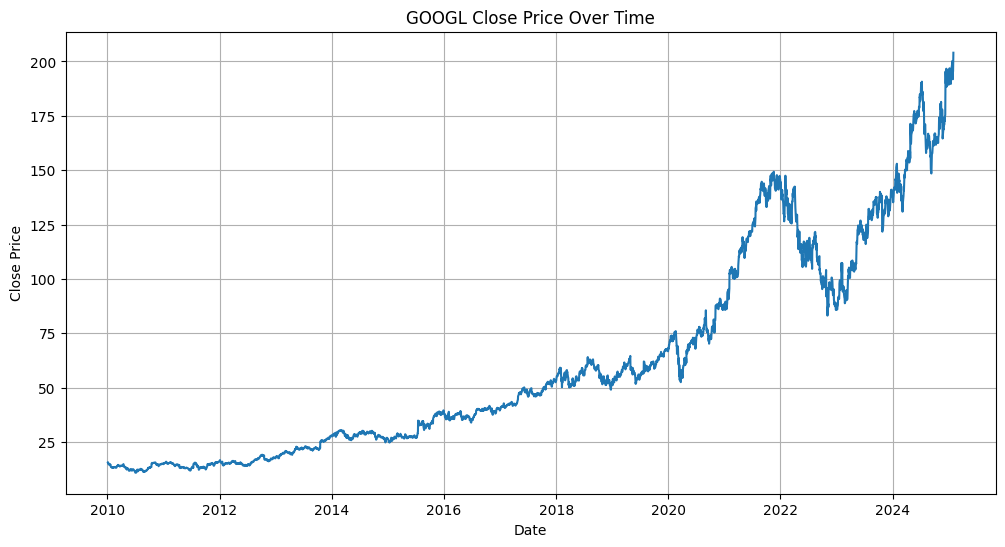

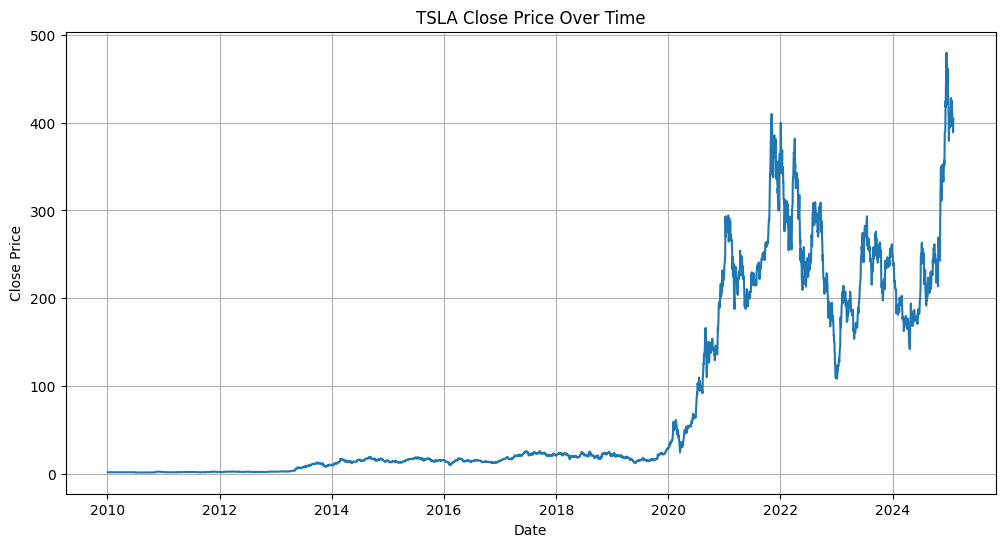

In [8]:
tickers_to_plot = ['AAPL', 'GOOGL', 'TSLA']
for ticker in tickers_to_plot:
    df_t =long_df[long_df['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(df_t['Date'], df_t['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()

# 2. Rolling Average (30-day)
✅ What it shows:
A smoother version of the stock's trend by taking the average of the last 30 days for every day.

🧠 Why it's important:
Reduces noise from daily ups/downs.
Helps you see the real trend (uptrend/downtrend).

🔧 How we did it:
rolling(window=30).mean() calculates the average of the last 30 days.

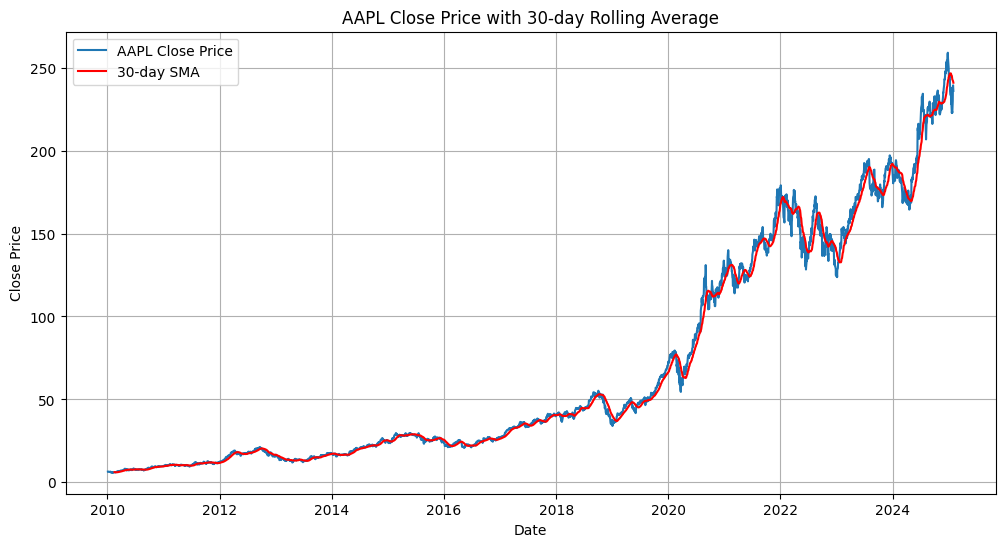

In [9]:
ticker ='AAPL'
df_t=long_df[long_df['Ticker'] == ticker].copy()
df_t['RollingMean'] = df_t['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_t['Date'], df_t['Close'], label=f'{ticker} Close Price')
plt.plot(df_t['Date'], df_t['RollingMean'], label='30-day SMA', color='red')
plt.title(f'{ticker} Close Price with 30-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.legend()
plt.show()

# 3. Outlier Detection via Boxplot
✅ What it shows:
Identifies extreme prices (outliers) that are unusually high or low.

🧠 Why it's important:
You can spot sudden spikes or crashes that may need investigation.

🔧 How we did it:
One box per stock shows typical price range and flags outliers outside that range.


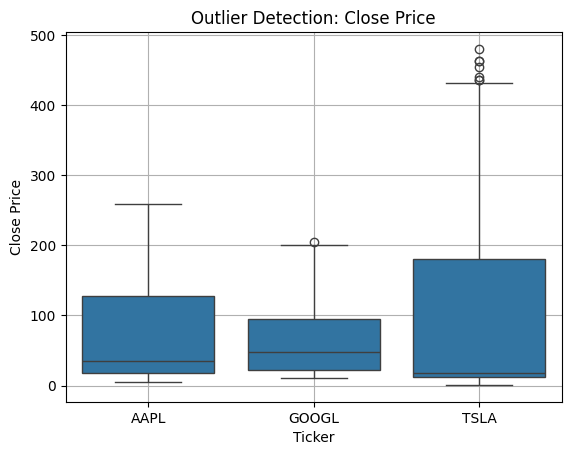

In [10]:
sns.boxplot(x='Ticker', y='Close', data=nonempty_df[nonempty_df['Ticker'].isin(tickers_to_plot)])
plt.title('Outlier Detection: Close Price')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 4. Volume Trends
✅ What it shows:
How many shares were traded each day (volume).

🧠 Why it's important:
High volume = high interest or major events.
Helps understand market activity around specific dates.

🔧 How we did it:
Plotted Volume for each date.

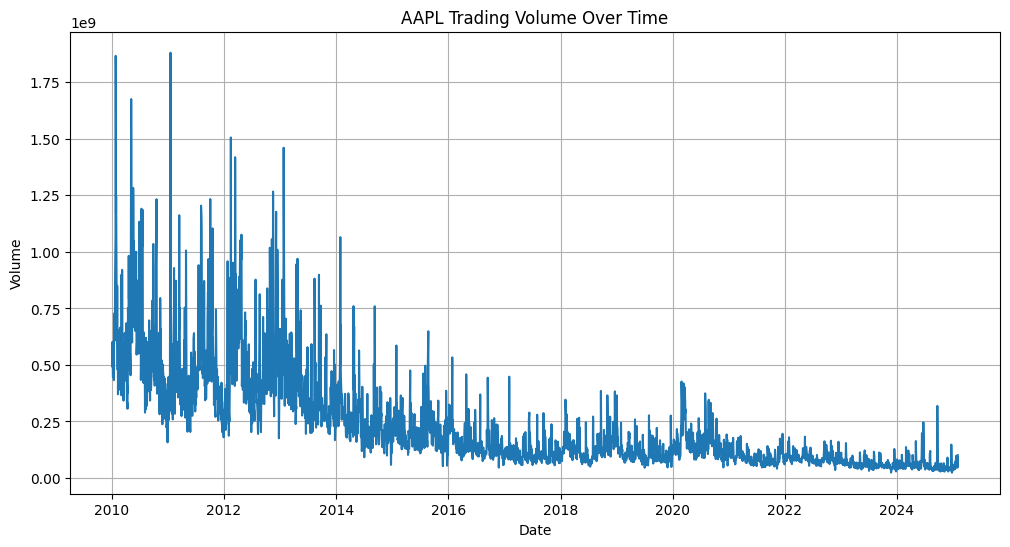

In [11]:
ticker='AAPL'
df_t=long_df[long_df['Ticker'] == ticker]
plt.figure(figsize=(12, 6))
plt.plot(df_t['Date'], df_t['Volume'], label=f'{ticker} Volume')
plt.title(f'{ticker} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 5. Daily Returns Distribution
✅ What it shows:
A chart of how often the stock went up or down and by how much (returns).

🧠 Why it's important:
Helps measure risk and volatility.
Shows if returns are normally distributed or skewed.

🔧 How we did it:
Calculated percentage change between days and plotted a histogram.

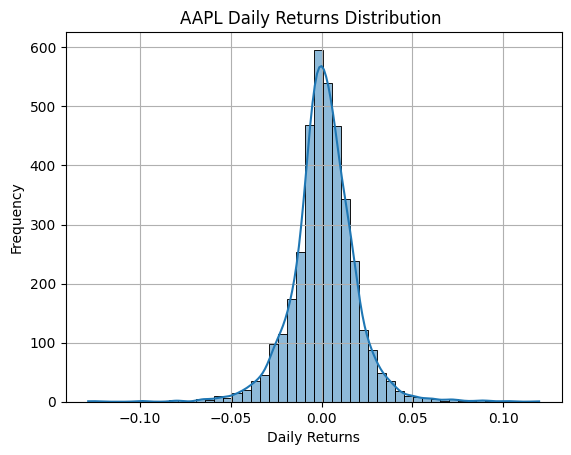

In [12]:
df_returns =long_df.copy()
df_returns['Return'] = df_returns.groupby('Ticker')['Close'].pct_change()
sns.histplot(df_returns[df_returns['Ticker'] == 'AAPL']['Return'].dropna(), bins=50, kde=True)
plt.title(f'{ticker} Daily Returns Distribution ')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 6. Correlation Heatmap
✅ What it shows:
How closely stocks move together.

🧠 Why it's important:
Positive correlation: Two stocks move similarly.
Negative: One goes up, other goes down.
Helps in portfolio diversification.

🔧 How we did it:
Created a matrix of correlation values between all stock closing prices.

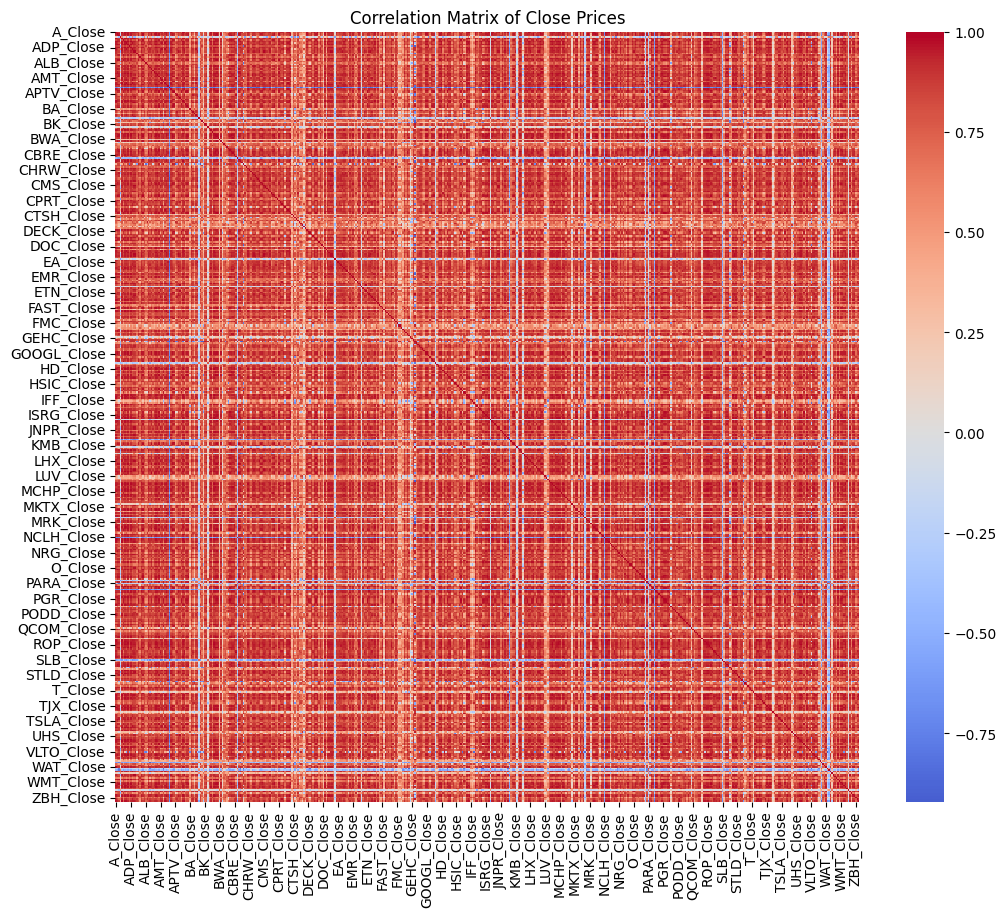

In [13]:
close_cols = [col for col in wide_df.columns if col.endswith('Close')]
corr_matrix = wide_df[close_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Close Prices')
plt.show()

# 7. Volatility (Rolling Std Dev)
✅ What it shows:
Measures how much a stock’s price fluctuates over time.

🧠 Why it's important:
High volatility = risky stock.

Good to identify stable vs unpredictable stocks.

🔧 How we did it:
Used rolling window standard deviation of returns.

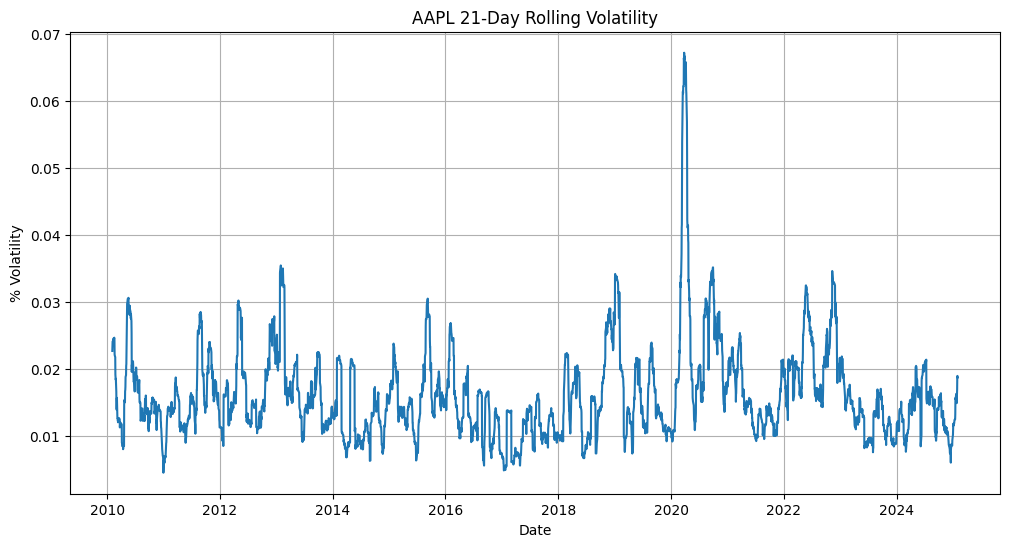

In [14]:
df_vol = long_df[long_df['Ticker'] == 'AAPL'].copy()
df_vol['RollingVolatility'] = df_vol['Close'].pct_change().rolling(window=21).std()
plt.figure(figsize=(12, 6))
plt.plot(df_vol['Date'], df_vol['RollingVolatility'], label='AAPL Volatility')
plt.title(f'{ticker} 21-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('% Volatility')
plt.grid(True)
plt.show()

# 8. Trend Classification Count
✅ What it shows:
Count of days when the stock went up (1) or down/stayed same (0).

🧠 Why it's important:
Lays the foundation for classification models (like predicting tomorrow’s movement).

🔧 How we did it:
Compared today’s Close with tomorrow’s Close using .shift(-1).

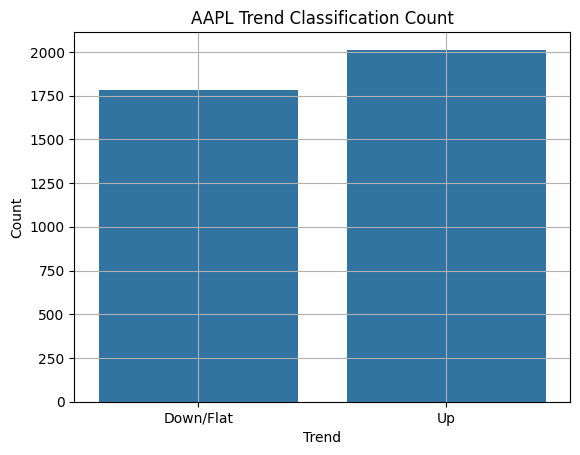

In [15]:
from sklearn.preprocessing import LabelEncoder
trend_df = long_df.copy()
trend_df['Close_next'] = trend_df.groupby('Ticker')['Close'].shift(-1)
trend_df['Target_Trend'] = (trend_df['Close_next'] > trend_df['Close']).astype(int)
sns.countplot(data=trend_df[trend_df['Ticker'] == 'AAPL'],x='Target_Trend')
plt.title(f'{ticker} Trend Classification Count')
plt.xlabel('Trend')
plt.ylabel('Count')
plt.xticks([0, 1], ['Down/Flat', 'Up'])
plt.grid(True)
plt.show()

# 9. Interactive Close vs Volume Scatter (Plotly)
✅ What it shows:
Relationship between traded volume and closing price.

🧠 Why it's important:
Can reveal if high volumes affect prices.

Also allows date-based coloring for interactive filtering.

🔧 How we did it:
Used Plotly for interactivity; plotted Volume

In [16]:
df_plotly=long_df[long_df['Ticker'] == 'AAPL'].copy()
fig =px.scatter(df_plotly,x='Volume',y='Close',color='Date',title=f'{ticker} Close vs Volume (Color =Date)')
fig.show()

# 10. Candlestick Chart (Plotly)
📊 What it shows:
Price movement during each day — showing Open, High, Low, and Close in a compact candle format.

🧠 Why it's important:
Gives a visual snapshot of daily market behavior:
Is price rising or falling?
Were there big intraday swings?
How did it close vs how it opened?
Traders rely heavily on these to read signals and patterns (like doji, hammer, engulfing, etc.).

🔧 How we did it:
Used plotly.graph_objects.Candlestick to:
Set x = Date
Open, High, Low, Close values for each row
Customize layout (title, axis)
Plot interactively with zoom/pan features


In [17]:
aapl_candle = nonempty_df[nonempty_df['Ticker'] == 'AAPL'].copy()
fig = go.Figure(data=[
        go.Candlestick(
            x=aapl_candle['Date'],
            open=aapl_candle['Open'],
            high=aapl_candle['High'],
            low=aapl_candle['Low'],
            close=aapl_candle['Close'],
            name='AAPL',
            increasing_line_width=3,
            decreasing_line_width=3
        )
    ])
fig.update_layout(
    title=f'{ticker} Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
)
fig.show()

# 11. RSI (Relative Strength Index)
📊 What it shows:
A line between 0 to 100 that reflects the momentum of recent price gains/losses.

🧠 Why it's important:
Helps detect overbought (>70) or oversold (<30) conditions:
RSI > 70 → stock might be too high, due for a drop.
RSI < 30 → stock might be too low, may bounce back.
This is a signal indicator used for timing entries/exits.

🔧 How we did it:
Calculated daily price change (delta)
Computed average gains and losses over 14 days
Used the RSI formula: RSI = 100 - (100 / (1 + RS))
Plotted line + horizontal markers at 70 and 30 for visual cues

In [18]:
def compute_rsi(series,window=14):
  delta =series.diff()
  gain = (delta.where(delta>0,0)).rolling(window).mean()
  loss = (-delta.where(delta<0,0)).rolling(window).mean()
  rs = gain/loss
  rsi = 100 - (100/(1+rs))
  return rsi

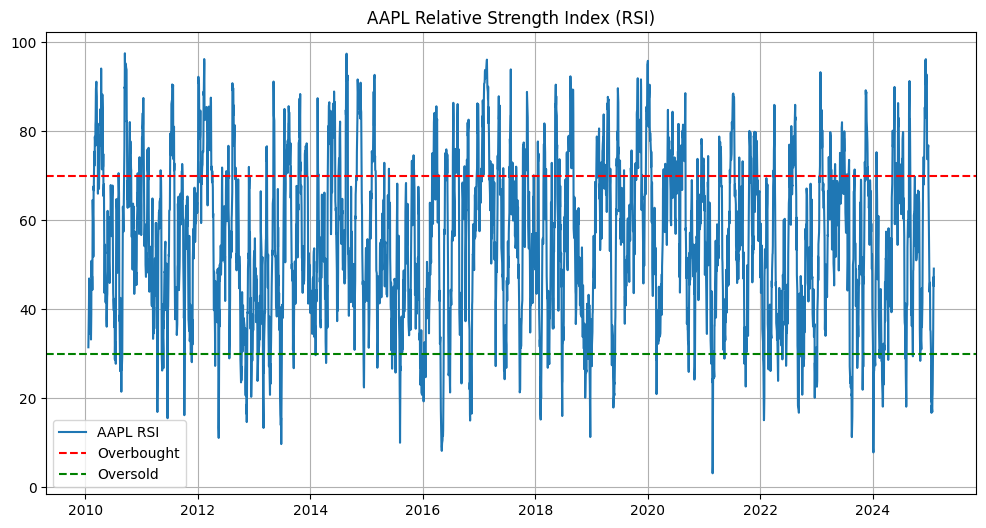

In [19]:
df_rsi =df_vol.copy()
df_rsi['RSI'] = compute_rsi(df_rsi['Close'])
plt.figure(figsize=(12, 6))
plt.plot(df_rsi['Date'], df_rsi['RSI'], label=f'{ticker} RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f"{ticker} Relative Strength Index (RSI)")
plt.legend()
plt.grid(True)
plt.show()

# 12. MACD (Moving Average Convergence Divergence)
📊 What it shows:
Two lines:
MACD line: Difference between fast (12-day) and slow (26-day) exponential moving averages (EMAs)
Signal line: 9-day EMA of the MACD line

🧠 Why it's important:
Detects momentum shifts:
MACD > Signal → uptrend signal (buy)
MACD < Signal → downtrend signal (sell)
It’s a go-to tool for spotting changes in trend direction.

🔧 How we did it:
Calculated 12-day and 26-day EMAs of Close price
Subtracted to get the MACD line
Smoothed it using 9-day EMA for signal line
Plotted both lines on the same chart

In [20]:
def compute_macd(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    return macd_line, signal_line

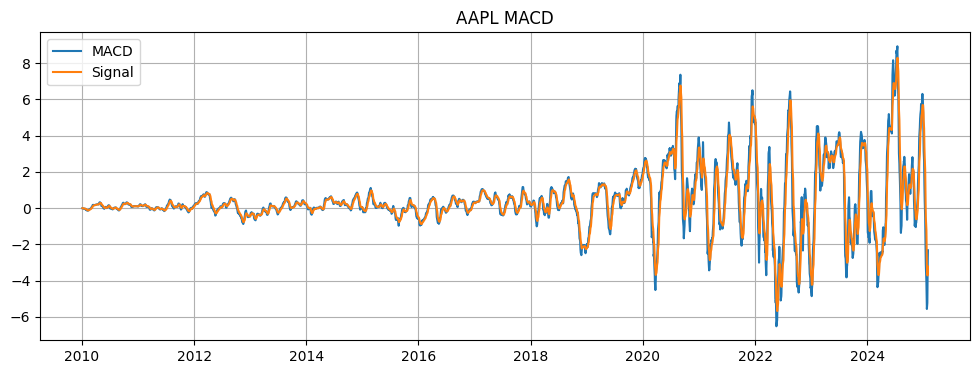

In [21]:
macd_line, signal_line = compute_macd(df_rsi['Close'])
plt.figure(figsize=(12, 4))
plt.plot(df_rsi['Date'], macd_line, label='MACD')
plt.plot(df_rsi['Date'], signal_line, label='Signal')
plt.title(f"{ticker} MACD")
plt.legend()
plt.grid(True)
plt.show()

# Extra Pointers

1. Modified version of MACD signal with "buy" & "sell" signal, and detection of crossover points

2. AutoCorrelation (ACF) and Partial AutoCorrelation (PACF) Plots

3. Seasonal Decomposition of Time Series

4. Pairplot of Returns

5. Open vs Close Price Relationship (Scatterplot with multiple tickers, FacetGrid)

# 13. Modified version of MACD signal with "buy" & "sell" signal, and detection of crossover points

📊 What it shows:
The chart visualizes the MACD line, Signal line, and MACD Histogram along with Buy (⬆️) and Sell (⬇️) signals based on crossover points.

🧠 Why it's important:
It helps identify momentum shifts and potential entry/exit points, which are crucial for timing trades in trend-following strategies.

🔧 How we did it:
We calculated the MACD and Signal lines using Exponential Moving Averages (EMAs), derived the histogram from their difference, and marked crossover points using logical conditions to detect bullish and bearish signals.

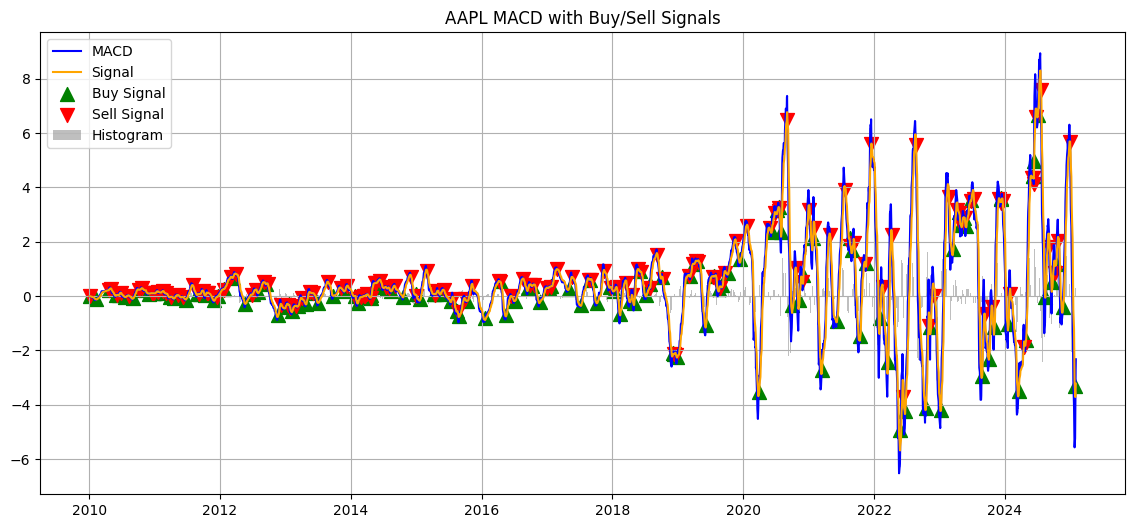

In [22]:
# Compute MACD, Signal, and Histogram
def compute_macd(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    macd_hist = macd_line - signal_line
    return macd_line, signal_line, macd_hist

# Calculate values
macd_line, signal_line, macd_hist = compute_macd(df_rsi['Close'])

# Detect crossover points
buy_signals = (macd_line > signal_line) & (macd_line.shift(1) <= signal_line.shift(1))
sell_signals = (macd_line < signal_line) & (macd_line.shift(1) >= signal_line.shift(1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_rsi['Date'], macd_line, label='MACD', color='blue')
plt.plot(df_rsi['Date'], signal_line, label='Signal', color='orange')
plt.bar(df_rsi['Date'], macd_hist, label='Histogram', color='gray', alpha=0.5)

# Plot crossover points
plt.scatter(df_rsi['Date'][buy_signals], macd_line[buy_signals], label='Buy Signal', color='green', marker='^', s=100)
plt.scatter(df_rsi['Date'][sell_signals], macd_line[sell_signals], label='Sell Signal', color='red', marker='v', s=100)

plt.title(f"{ticker} MACD with Buy/Sell Signals")
plt.legend()
plt.grid(True)
plt.show()

# 14. Auto Correlation(ACF) and Partial Auto Correlation(PACF) Plots

📊 What it shows:
The ACF plot displays how current values in a time series are correlated with past values (lags), while the PACF plot shows the direct correlation between a value and its lag, excluding intermediate lags.

🧠 Why it's important:
These plots help determine the number of lags to include in ARIMA models, aiding in the selection of AR (AutoRegressive) and MA (Moving Average) terms for accurate time series forecasting.

🔧 How we did it:
We used plot_acf() and plot_pacf() from the statsmodels library on the stock’s closing prices (or returns), specifying the number of lags to visually inspect significant autocorrelations and partial autocorrelations.

<Figure size 1000x400 with 0 Axes>

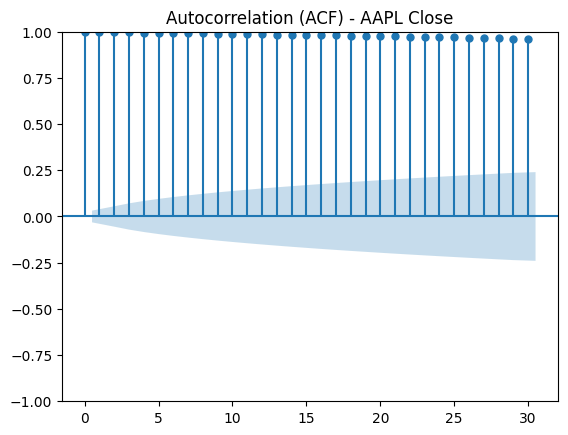

<Figure size 1000x400 with 0 Axes>

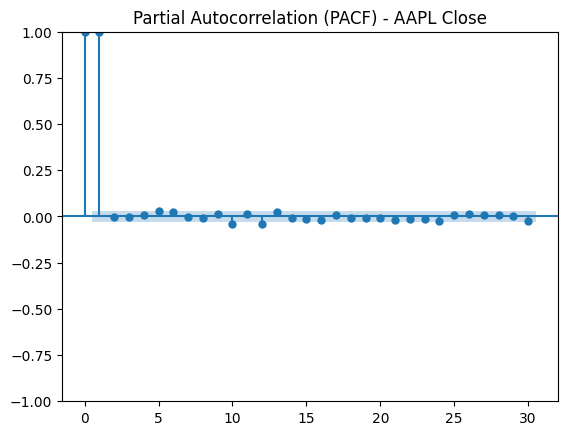

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select a stock — e.g., AAPL
ts = long_df[long_df['Ticker'] == 'AAPL']['Close'].dropna()

# Plot ACF
plt.figure(figsize=(10,4))
plot_acf(ts, lags=30)
plt.title("Autocorrelation (ACF) - AAPL Close")
plt.show()

# Plot PACF
plt.figure(figsize=(10,4))
plot_pacf(ts, lags=30)
plt.title("Partial Autocorrelation (PACF) - AAPL Close")
plt.show()

# 15. Seasonal Decomposition of Time Series

📊 What it shows:
The decomposition breaks down a time series into Trend, Seasonality, and Residual (noise) components to better understand the underlying patterns in the data.

🧠 Why it's important:
It reveals repeating seasonal patterns, long-term trends, and irregular random fluctuations, which is crucial for improving forecasting models and detecting anomalies.

🔧 How we did it:
We applied seasonal_decompose() from the statsmodels library on the closing price series, specifying the model type (e.g., 'additive' or 'multiplicative') and period to extract and visualize the components separately.

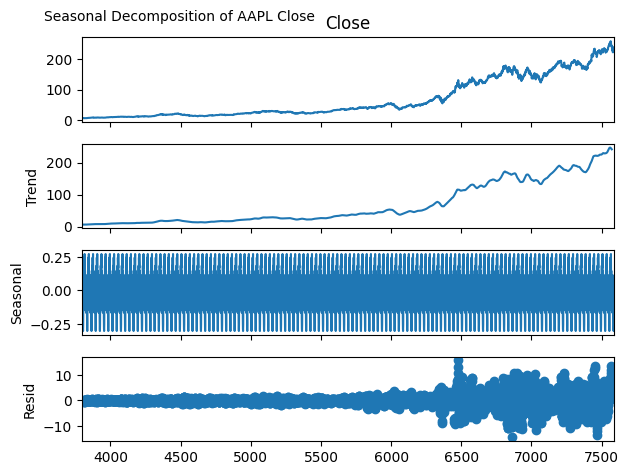

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=30)  # 30 days ~ 1 month

# trend_additive = result.trend
# seasonal_additive = result.seasonal
# residual_additive = result.resid

result.plot()
plt.suptitle("Seasonal Decomposition of AAPL Close", fontsize=10, ha='right')
plt.show()

# 16. Pairplot of Returns

📊 What it shows:
The pairplot displays scatter plots and histograms of returns between multiple assets or variables, helping visualize correlations, distributions, and relationships in one compact grid.

🧠 Why it's important:
It helps detect linear relationships, clusters, and outliers in return series, which is valuable for portfolio diversification, risk analysis, and feature selection in modeling.

🔧 How we did it:
We first calculated the daily percentage returns using .pct_change() on adjusted close prices, then used sns.pairplot() from Seaborn to plot the return relationships between selected stocks or time series features.

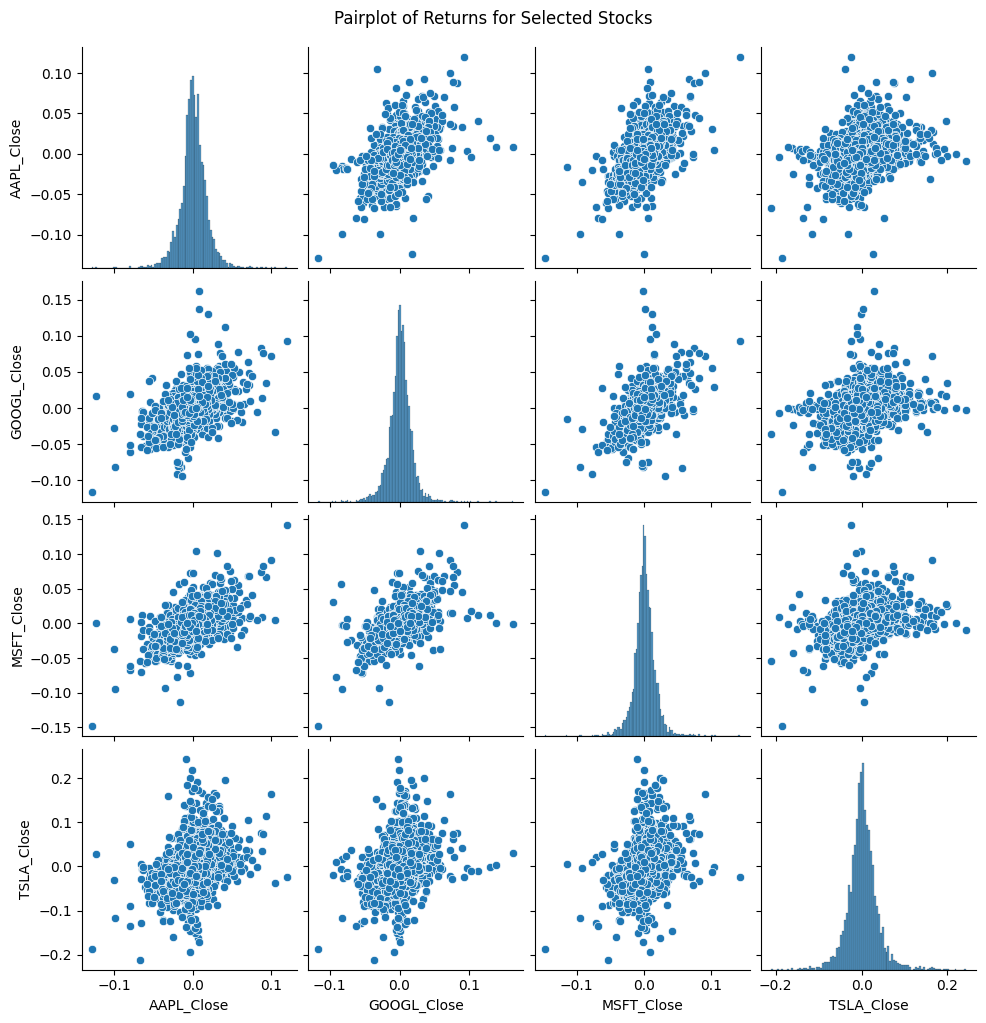

In [25]:
# Prepare returns wide dataframe
df_returns = wide_df.copy()
return_cols = [col for col in df_returns.columns if col.endswith('_Close')]
df_returns[return_cols] = df_returns[return_cols].pct_change()

# Select a subset of tickers
subset_cols = [col for col in return_cols if col.split('_')[0] in ['AAPL', 'MSFT', 'TSLA', 'GOOGL']]
df_subset = df_returns[subset_cols].dropna()

# Plot pairplot
sns.pairplot(df_subset)
plt.suptitle("Pairplot of Returns for Selected Stocks", y=1.02)
plt.show()

# 17. Open vs Close Price Relationship (Scatterplot with multiple tickers, FacetGrid)

| ✅ Visualization Technique             | 📌 Purpose                                                                 |
|----------------------------------------|---------------------------------------------------------------------------|
| **1. Scatterplot with multiple tickers**                      | Compare Open vs Close distribution across stocks.     |
| **2. FacetGrid**   | Side-by-side comparison of stocks' Open vs Close patterns.            |

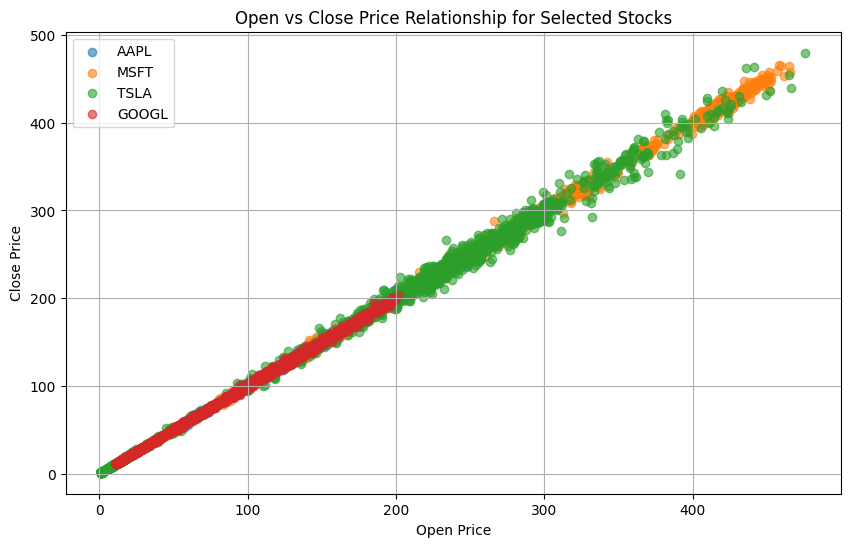

In [26]:
plt.figure(figsize=(10, 6))

# Plot scatter points for each ticker with a different color
for ticker in ['AAPL', 'MSFT', 'TSLA', 'GOOGL']:
    df_t = long_df[long_df['Ticker'] == ticker]
    plt.scatter(df_t['Open'], df_t['Close'], label=ticker, alpha=0.6)

plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close Price Relationship for Selected Stocks")
plt.legend()
plt.grid(True)
plt.show()

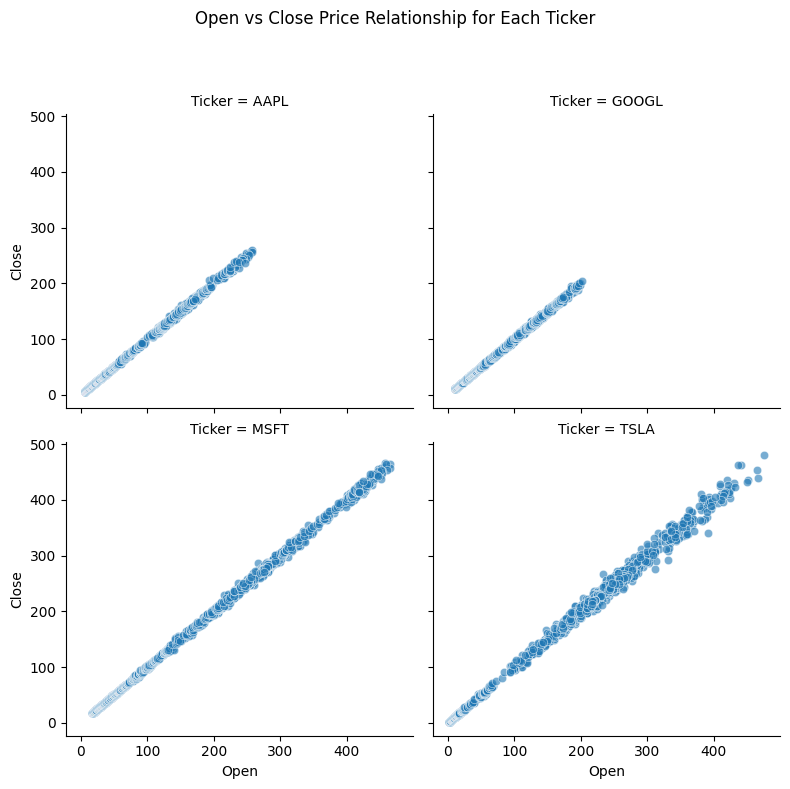

In [27]:
# Select a subset of stocks
df_plot = long_df[long_df['Ticker'].isin(['AAPL', 'MSFT', 'TSLA', 'GOOGL'])]

# Create FacetGrid with scatterplots for each stock
g = sns.FacetGrid(df_plot, col="Ticker", col_wrap=2, height=4)
g.map_dataframe(sns.scatterplot, x="Open", y="Close", alpha=0.6)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Open vs Close Price Relationship for Each Ticker")
plt.show()